#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased) 


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [2]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question: 
>* Add the files to your .gitignore
>* Give the size in Mb of the embeddings files before unzipping.
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings.


### Answer:
> - collobert_embeddings.txt.zip: 24.9 Mo
> - collobert_words.lst: 1.1 Mo
> - Loaded 130000 words with embeddings of dimension 50

In [5]:
import os
print(os.getcwd())
os.chdir('../nlp-lab-text-embedding')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP


FileNotFoundError: [Errno 2] No such file or directory: '../nlp-lab-text-embedding'

### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question: 
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [43]:
import numpy as np
import re

# YOUR CODE HERE

def load_data() -> tuple[list[str], np.ndarray]:
    """Loads words and their corresponding embeddings from files.
    
    Returns:
        tuple: A tuple containing:
            - A list of words.
            - A NumPy array of embeddings.
    
    Raises:
        ValueError: If the number of words and embeddings do not match.
    """
    
    ### words
    with open("data/collobert_words.lst", "r", encoding="utf-8") as file:
        lines = file.readlines()

    words = [re.sub(r"^''|''$", "", line.strip()) for line in lines if line.strip()]


    ### embeddings
    embeddings = np.genfromtxt("data/collobert_embeddings.txt", dtype=np.float32)

    ### check 
    if len(words) != len(embeddings):
        raise ValueError(f"Size mismatch: {len(words)} words vs {len(embeddings)} embeddings")

    print(f"Loaded {len(words)} words with embeddings of dimension {embeddings.shape[1]}")

    return words, embeddings


In [44]:
words, embeddings = load_data()

Loaded 130000 words with embeddings of dimension 50


In [45]:
print(words[:30])
print(embeddings[0])

['!', '!_____!____________!_____!_____!_______!_____!_______!______', '"', '#', '####', '#0', '#0&btr', '#aaa', '#n', '#value', '$', '%', '&', '&money', "'", '', "'", "'0", "'the", '0', 'a', 'admiral', 'alabama', 'angel', 'ark', 'arleigh', 'b', 'balao', 'banksia', 'big']
[-1.03682    1.77856   -0.693547   1.5948     1.5799     0.859243
  1.15221   -0.976317   0.745304  -0.494589   0.308086   0.25239
 -0.1976     1.26203    0.813864  -0.940734  -0.215163   0.11645
  0.525697   1.95766    0.394232   1.27717    0.710788  -0.389351
  0.161775  -0.106038   1.14148    0.607948   0.189781  -1.06022
  0.280702   0.0251156 -0.198067   2.33027    0.408584   0.350751
 -0.351293   1.77318   -0.723457  -0.13806   -1.47247    0.541779
 -2.57005   -0.227714  -0.817816  -0.552209   0.360149  -0.10278
 -0.36428   -0.64853  ]


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches. 

#### Question 
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [47]:
import numpy as np
from scipy.spatial import KDTree
# YOUR CODE HERE

# KDTree
kdtree = KDTree(embeddings)
query_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']


In [62]:
query_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']

### Trouver les 5 plus proches voisins pour chaque mot
words_plus_neighbors = {}

for word in query_words:
    if word in words:
        index = words.index(word)
        distances, indices = kdtree.query(embeddings[index], k=6)  # k=6 in order to include the word itself
        neighbors = [words[i] for i in indices if words[i] != word]
        words_plus_neighbors[word] = neighbors
    else:
        print(f"{word} not found in the vocabulary.")

### print the answer
for word, neighbors in words_plus_neighbors.items():
    print(f"{word}: {', '.join(neighbors)}")

mother: daughter, wife, father, husband, son
computer: laptop, multimedia, desktop, software, wiki
dentist: pharmacist, midwife, physician, housekeeper, veterinarian
war: revolution, death, court, independence, history
president: governor, chairman, mayor, secretary, senator
secretary: minister, treasurer, chairman, commissioner, undersecretary
nurse: physician, veterinarian, dentist, surgeon, midwife


In [63]:
words_plus_neighbors_list = list(words_plus_neighbors.keys()) + [
    neighbor for neighbors in words_plus_neighbors.values() for neighbor in neighbors
]

words_plus_neighbors_list

['mother',
 'computer',
 'dentist',
 'war',
 'president',
 'secretary',
 'nurse',
 'daughter',
 'wife',
 'father',
 'husband',
 'son',
 'laptop',
 'multimedia',
 'desktop',
 'software',
 'wiki',
 'pharmacist',
 'midwife',
 'physician',
 'housekeeper',
 'veterinarian',
 'revolution',
 'death',
 'court',
 'independence',
 'history',
 'governor',
 'chairman',
 'mayor',
 'secretary',
 'senator',
 'minister',
 'treasurer',
 'chairman',
 'commissioner',
 'undersecretary',
 'physician',
 'veterinarian',
 'dentist',
 'surgeon',
 'midwife']

### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). 

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

In [70]:
from sklearn.manifold import TSNE
# graphics
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# retrieve the word representation
# create the tSNE transform
# fit and transform the word vectors, store in T
# YOUR CODE HERE

embeddings_words_list = [embeddings[words.index(word)] for word in words_plus_neighbors_list]
word_vectors = np.array(embeddings_words_list)

# create a tSNE object with specified parameters
tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15.0)

# compute the tSNE transformation
T = tsne.fit_transform(word_vectors)

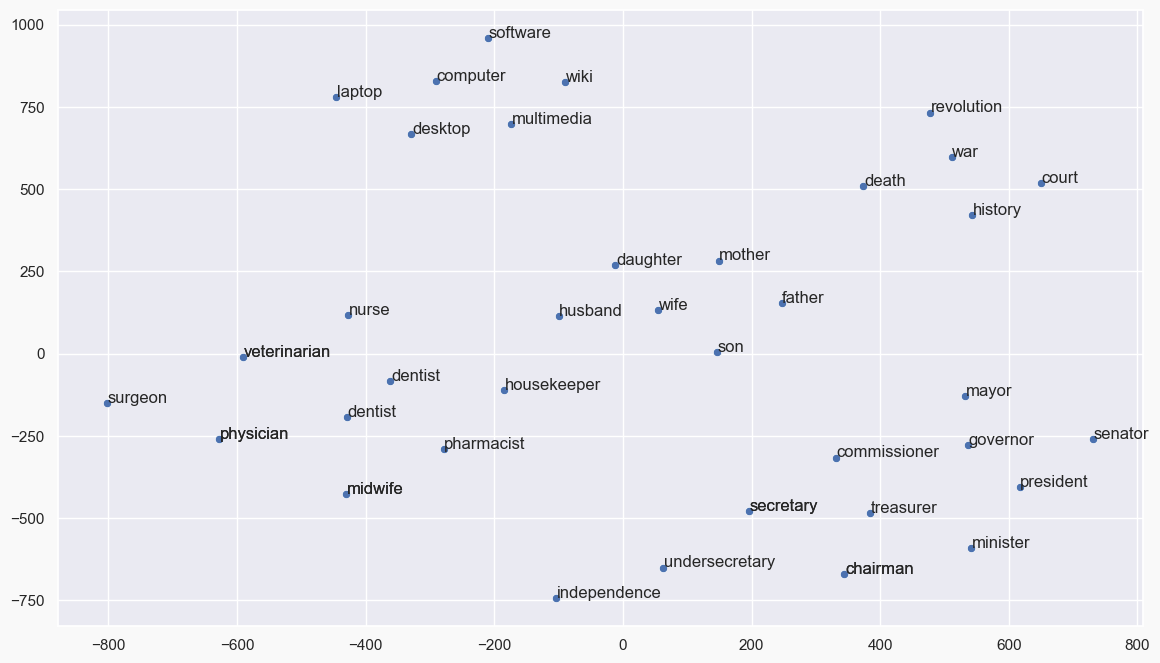

In [71]:
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

sns.set_theme(rc={'figure.figsize':(14, 8)})
sns.set_theme(font_scale=1)

sns.scatterplot(x=T[:, 0], y=T[:, 1])

for label, x, y in zip(words_plus_neighbors_list, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words. 

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - [frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library: 
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question: 
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.

#### Answer: 
>* enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin: 126.1 Mo

In [8]:
from gensim.models import KeyedVectors

# Charger le fichier binaire des embeddings
embedding_file = "data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True)

# Obtenir le nombre de mots et la taille des embeddings
num_words = len(model.index_to_key)  # Nombre de mots dans le vocabulaire
embedding_size = model.vector_size  # Taille des embeddings

print(f"Nombre de mots : {num_words}")
print(f"Taille des embeddings : {embedding_size}")


02:51:32 INFO:loading projection weights from data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin
02:51:33 INFO:KeyedVectors lifecycle event {'msg': 'loaded (155562, 200) matrix of type float32 from data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-03-04T14:51:33.882273', 'gensim': '4.3.3', 'python': '3.12.3 | packaged by Anaconda, Inc. | (main, May  6 2024, 14:43:12) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


Nombre de mots : 155562
Taille des embeddings : 200


#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it. 

#### Question: 
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [80]:
from gensim.models import KeyedVectors

## Load model
embedding_file = "data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")


## Closest words
word1 = "chevalier"
word2 = "yokohama"
word3 = "kanto"
word4 = "shamisen"

print(f"Most similar words to '{word1}':")
print(model.most_similar(word1))

print(f"\nMost similar words to '{word2}':")
print(model.most_similar(word2))

print(f"\nMost similar words to '{word3}':")
print(model.most_similar(word3))



03:56:32 INFO:loading projection weights from data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin
03:56:33 INFO:KeyedVectors lifecycle event {'msg': 'loaded (155562, 200) matrix of type float32 from data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-02-17T15:56:33.953683', 'gensim': '4.3.3', 'python': '3.12.3 | packaged by Anaconda, Inc. | (main, May  6 2024, 14:43:12) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


Most similar words to 'chevalier':
[('commandeur', 0.6844523549079895), ('chevaliers', 0.6799763441085815), ('écuyer', 0.6333732008934021), ('grand-croix', 0.621898353099823), ('preux', 0.6011075377464294), ('chevalerie', 0.5404019951820374), ('légion', 0.5335969924926758), ('honneur', 0.49536094069480896), ('yvain', 0.4855087101459503), ('insignes', 0.4742659330368042)]

Most similar words to 'yokohama':
[('tokyo', 0.7117856740951538), ('tôkyô', 0.6314416527748108), ('japon', 0.621522068977356), ('nagoya', 0.61984783411026), ('kyushu', 0.6141084432601929), ('osaka', 0.6123895645141602), ('fukuoka', 0.5612888336181641), ('japonaise', 0.5507327318191528), ('sendai', 0.5496150255203247), ('japonais', 0.5391371846199036)]

Most similar words to 'kanto':
[('pokémon', 0.5426285266876221), ('mewtwo', 0.5076007843017578), ('pokémons', 0.4970632791519165), ('saito', 0.4549728333950043), ('pokédex', 0.4486732482910156), ('yusuke', 0.4416310787200928), ('osaka', 0.4372846186161041), ('shôgun', 0

#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question: 
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [98]:
## YOUR CODE HERE
print(model.most_similar(positive=["france","japon"], negative=["paris"], topn=3))
print(model.most_similar(positive=["france","japon"], negative=["chevalier"], topn=3))
print(model.most_similar(positive=["roi","femme"], negative=["homme"], topn=3))


[('pays', 0.6233169436454773), ('corée', 0.5719293355941772), ('grande-bretagne', 0.5023671984672546)]
[('pays', 0.5496599078178406), ('corée', 0.5406747460365295), ('chine', 0.5264606475830078)]
[('reine', 0.6945513486862183), ('duchesse', 0.624755322933197), ('épouse', 0.6083102822303772)]


## Contextual embeddings with BERT 

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace : 

In [99]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model 
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # to access the hidden states
                                  )
# set the model to "evaluation" mode
model.eval()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model. 

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [101]:
import random
num_tokens = len(tokenizer.vocab)
print(f"The BERT tokenizer knows {num_tokens} different tokens.")

# Get the list of tokens
tokens_list = list(tokenizer.vocab.keys())

# Select 100 random tokens
random_tokens = random.sample(tokens_list, 100)

# Display the tokens
print("100 random tokens from the BERT vocabulary:")
print(random_tokens)


The BERT tokenizer knows 30522 different tokens.
100 random tokens from the BERT vocabulary:
['nadu', '##break', '##ز', 'trilogy', '[unused682]', 'jocelyn', '##ki', 'indefinite', 'simone', 'haiti', 'transport', 'specialised', 'ohio', 'criticizing', 'intellect', 'server', 'enter', 'government', '##asi', 'mortals', 'watering', '##iac', 'buddies', 'smoking', 'colored', '##combe', 'reacting', 'stuck', 'imposed', 'programmer', 'til', 'devices', 'afford', 'sanders', 'arsenal', 'piano', 'functioned', '##ffer', 'catches', '1990', 'mutter', '##je', 'toxin', 'nirvana', '##o', '##rand', 'exploit', 'daniela', '1861', '##خ', '##tore', 'postage', 'roast', 'chaired', 'ship', 'adler', 'ignited', 'unmarried', 'afghan', 'pry', '[unused556]', '##॥', '##ј', 'moniker', 'hereditary', 'af', 'manifold', '##eld', 'scrubbed', '##therapy', 'alvarez', 'franchises', 'copies', 'monte', 'supremacy', 'tinged', 'feb', 'verified', 'forehead', 'sts', '##cci', 'saddle', 'cite', 'established', '##oshi', 'cole', 'neck', '#

The tokenizer splits sentences and transforms the elements (words or sub-words) into clues. 

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second. 

Two specific tokens must also be added: 
* CLS], a specific token used for sentence classification
* SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [102]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """ Apply the BERT tokenizer to a list of words representing a sentence
        and return 3 lists: 
        - list of token indx
        - list of token for debugging, not used by the BERT model
        - list of sentence index
        """
    # Add the special tokens.
    tagged_snt = "[CLS] " + snt + " [SEP]" 
    # Tokenize
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    # convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    # mark the words in sentence.
    segments_ids = [1] * len(tokenized_snt)

    return (indexed_snt, tokenized_snt, segments_ids)

# YOUR CODE HERE

# Apply the function to each sentence
indexed_snt1, tokenized_snt1, segments_snt1 = bert_tokenize(snt1)
indexed_snt2, tokenized_snt2, segments_snt2 = bert_tokenize(snt2)
indexed_snt3, tokenized_snt3, segments_snt3 = bert_tokenize(snt3)

# Display tokenized results
print("\nSentence 1:")
for idx, token in zip(indexed_snt1, tokenized_snt1):
    print(f"{token}: {idx}")

print("\nSentence 2:")
for idx, token in zip(indexed_snt2, tokenized_snt2):
    print(f"{token}: {idx}")

print("\nSentence 3:")
for idx, token in zip(indexed_snt3, tokenized_snt3):
    print(f"{token}: {idx}")

# Check if "plant" has the same token index in both sentences
plant_index1 = indexed_snt1[tokenized_snt1.index("plant")]
plant_index3 = indexed_snt3[tokenized_snt3.index("plant")]

print(f"\n'plant' index in Sentence 1: {plant_index1}")
print(f"'plant' index in Sentence 3: {plant_index3}")

if plant_index1 == plant_index3:
    print("\nThe word 'plant' has the same token index in both sentences.")
else:
    print("\nThe word 'plant' has a different token index in the two sentences.")



Sentence 1:
[CLS]: 101
the: 1996
plant: 3269
has: 2038
reached: 2584
its: 2049
maximal: 29160
level: 2504
of: 1997
production: 2537
.: 1012
[SEP]: 102

Sentence 2:
[CLS]: 101
the: 1996
cars: 3765
are: 2024
assembled: 9240
inside: 2503
the: 1996
factory: 4713
.: 1012
[SEP]: 102

Sentence 3:
[CLS]: 101
a: 1037
plant: 3269
needs: 3791
sunlight: 9325
and: 1998
water: 2300
to: 2000
grow: 4982
well: 2092
.: 1012
[SEP]: 102

'plant' index in Sentence 1: 3269
'plant' index in Sentence 3: 3269

The word 'plant' has the same token index in both sentences.


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model. 

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [103]:

def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
        and return the last hidden layer
    """
    with torch.no_grad():
        # Convert inputs to PyTorch tensors
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        one_hidden_layer = hidden_states[12][0]
        
    return one_hidden_layer

# YOUR CODE HERE

indexed_snt1, tokenized_snt1, segments_snt1 = bert_tokenize(snt1)
indexed_snt2, tokenized_snt2, segments_snt2 = bert_tokenize(snt2)
indexed_snt3, tokenized_snt3, segments_snt3 = bert_tokenize(snt3)

# Apply BERT model
embedding_snt1 = predict_hidden(indexed_snt1, segments_snt1)
embedding_snt2 = predict_hidden(indexed_snt2, segments_snt2)
embedding_snt3 = predict_hidden(indexed_snt3, segments_snt3)

# Display the dimensions of the embeddings
print(f"Shape of embeddings for Sentence 1: {embedding_snt1.shape}")
print(f"Shape of embeddings for Sentence 2: {embedding_snt2.shape}")
print(f"Shape of embeddings for Sentence 3: {embedding_snt3.shape}")

# Extract the dimension of a single word embedding
embedding_dim = embedding_snt1.shape[1]
print(f"\nThe dimension of each word embedding vector is: {embedding_dim}")

Shape of embeddings for Sentence 1: torch.Size([12, 768])
Shape of embeddings for Sentence 2: torch.Size([10, 768])
Shape of embeddings for Sentence 3: torch.Size([12, 768])

The dimension of each word embedding vector is: 768


The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal) 
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2 
> distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2 
> How can we interpret these distances?

In [112]:
from scipy.spatial.distance import cosine


# Extraction des embeddings des mots spécifiques
plant_1 = embedding_snt1[tokenized_snt1.index("plant")]  
plant_3 = embedding_snt3[tokenized_snt3.index("plant")] 
factory_2 = embedding_snt2[tokenized_snt2.index("factory")]  
production_1 = embedding_snt1[tokenized_snt1.index("production")]  

# Calcul des distances cosinus entre les embeddings
distance_plant1_plant3 = cosine(plant_1, plant_3)  
distance_plant1_factory2 = cosine(plant_1, factory_2) 
distance_plant1_production1 = cosine(plant_1, production_1)  
distance_plant3_production1 = cosine(plant_3, production_1)  

# Affichage des distances calculées
print("Distance entre 'plant' (phrase 1) et 'plant' (phrase 3):", distance_plant1_plant3)
print("Distance entre 'plant' (phrase 1) et 'factory' (phrase 2):", distance_plant1_factory2)
print("Distance entre 'plant' (phrase 1) et 'production' (phrase 1):", distance_plant1_production1)
print("Distance entre 'plant' (phrase 3) et 'production' (phrase 1):", distance_plant3_production1)


Distance entre 'plant' (phrase 1) et 'plant' (phrase 3): 0.4986629014088184
Distance entre 'plant' (phrase 1) et 'factory' (phrase 2): 0.31225680432199554
Distance entre 'plant' (phrase 1) et 'production' (phrase 1): 0.24017350123199277
Distance entre 'plant' (phrase 3) et 'production' (phrase 1): 0.6200192392227519


> On analyse ici la cosine distance et non la cosine similarity. Ainsi plus la distance est faible et plus les mots sont proches. 
> Le mot plant dans la phrase 1 est proche du mot factory de la phrase 2 (0.31) et du mot production de la phrase 1 (0.24). En revanche le mot plant de la phrase 1 qui se réfère à l'usine est éloigné du mot plant de la phrase 3 (0.50) tout comme ce même mot plant de la phrase 3 et le mot production de la phrase 1 (0.62). Cela est cohérent avec ce qu'on aimerait puisqu'on prend en compte le contexte : 
> - un même mot peut avoir 2 embeddings. 